In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from models.victim_params import VictimParams
from qiskit.result import marginal_counts

In [2]:
provider = IBMProvider()

In [3]:
victim_qubits = (5, 8, 11, 14)
snooper_qubits = (3, 9, 13, 2, 12, 1, 10, 15, 0, 4, 6, 7)
ancilla_qubits = ()

In [4]:
qc_circ_names = [
    'no cnots',
]

a, b, c, d = victim_qubits

cx_gates_applied_per_circ = [
    [[a, b]],
    [[b, a]], 
    [[b, c]], 
    [[c, b]], 
    [[c, d]], 
    [[d, c]], 
    [[a, b], [c, d]], 
    [[a, b], [d, c]],
    [[b, a], [c, d]], 
    [[b, a], [d, c]]
]

for rep in (1, 3, 5):
    for cx_gates_applied in cx_gates_applied_per_circ:
        qc_circ_names.append('{}x{}'.format(str(cx_gates_applied), rep))

# Job - ci8rqlhg5luj4chgblug

In [5]:
job_id = 'ci8rqlhg5luj4chgblug'

## Fetch data from backend

In [6]:
job = provider.backend.retrieve_job(job_id)
qcs = job.circuits()
counts = job.result().get_counts()

## Analysis

(3, 9, 13)


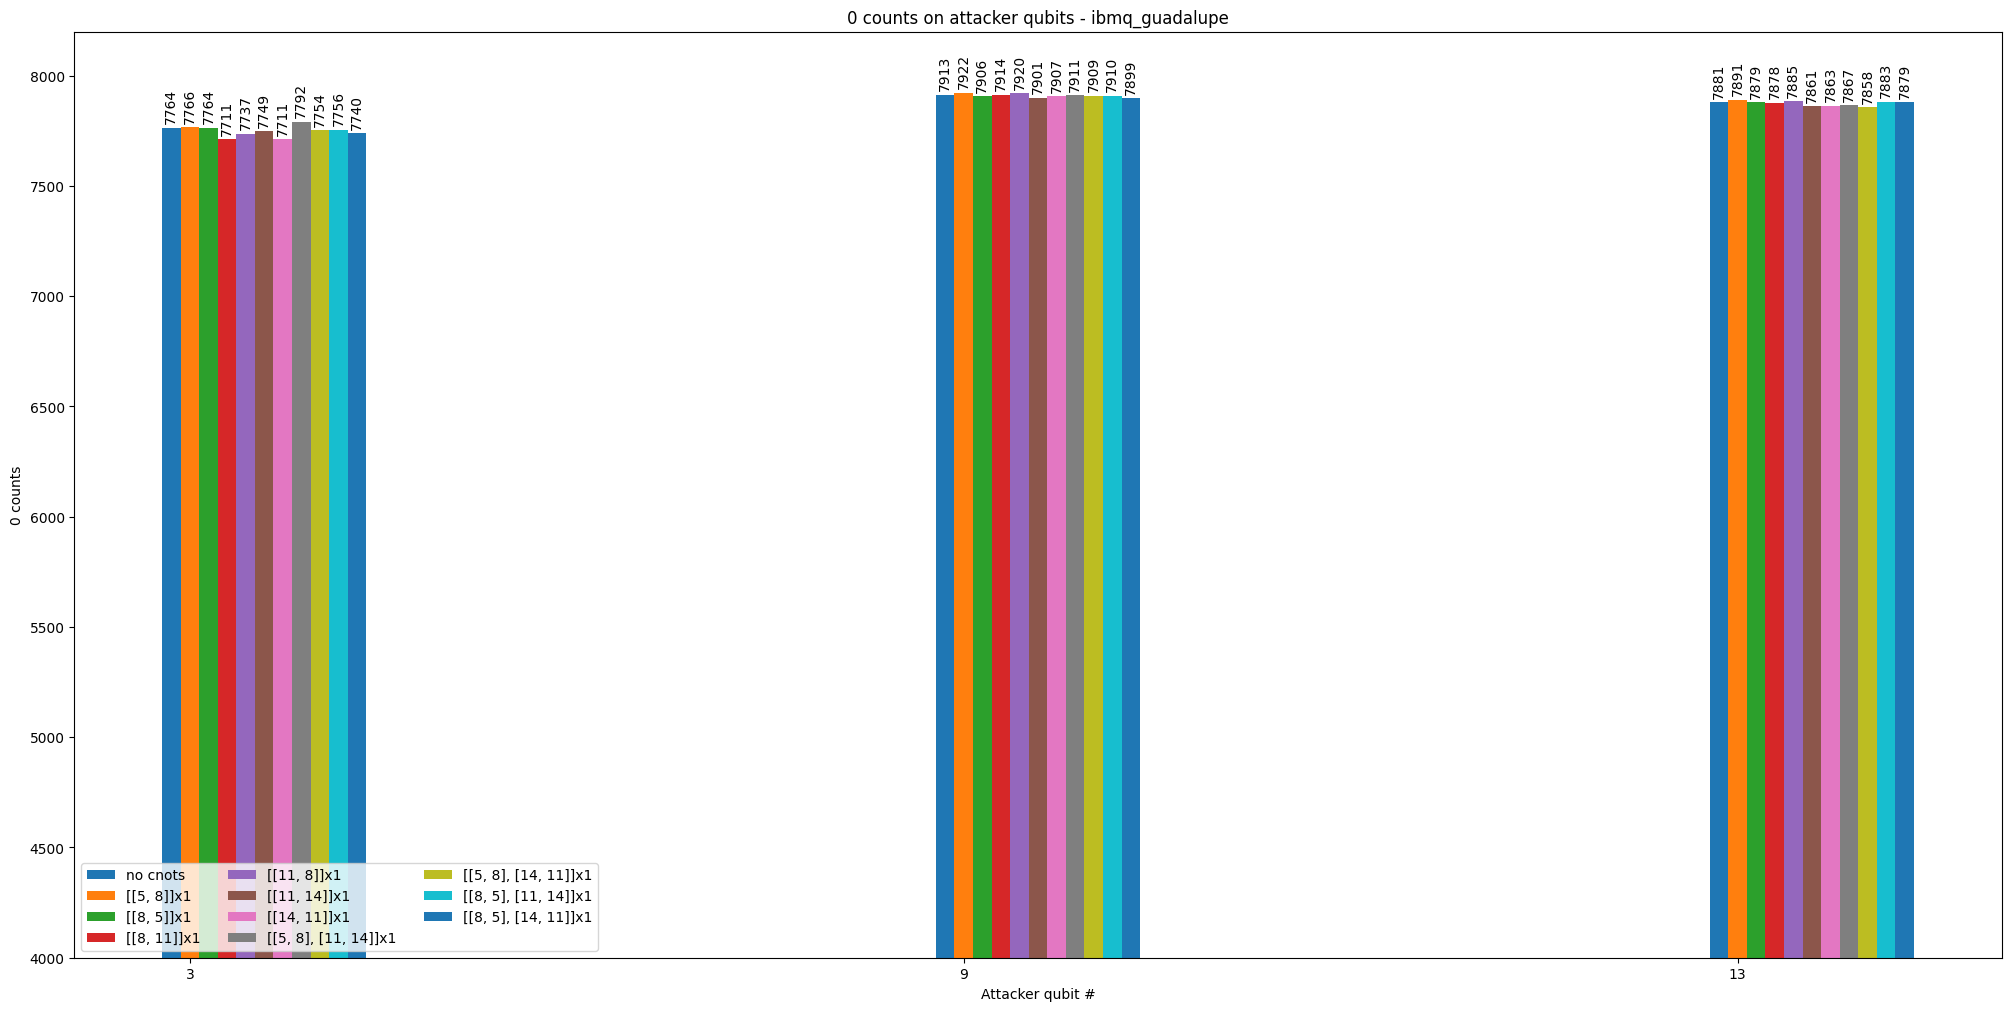

(2, 12, 1)


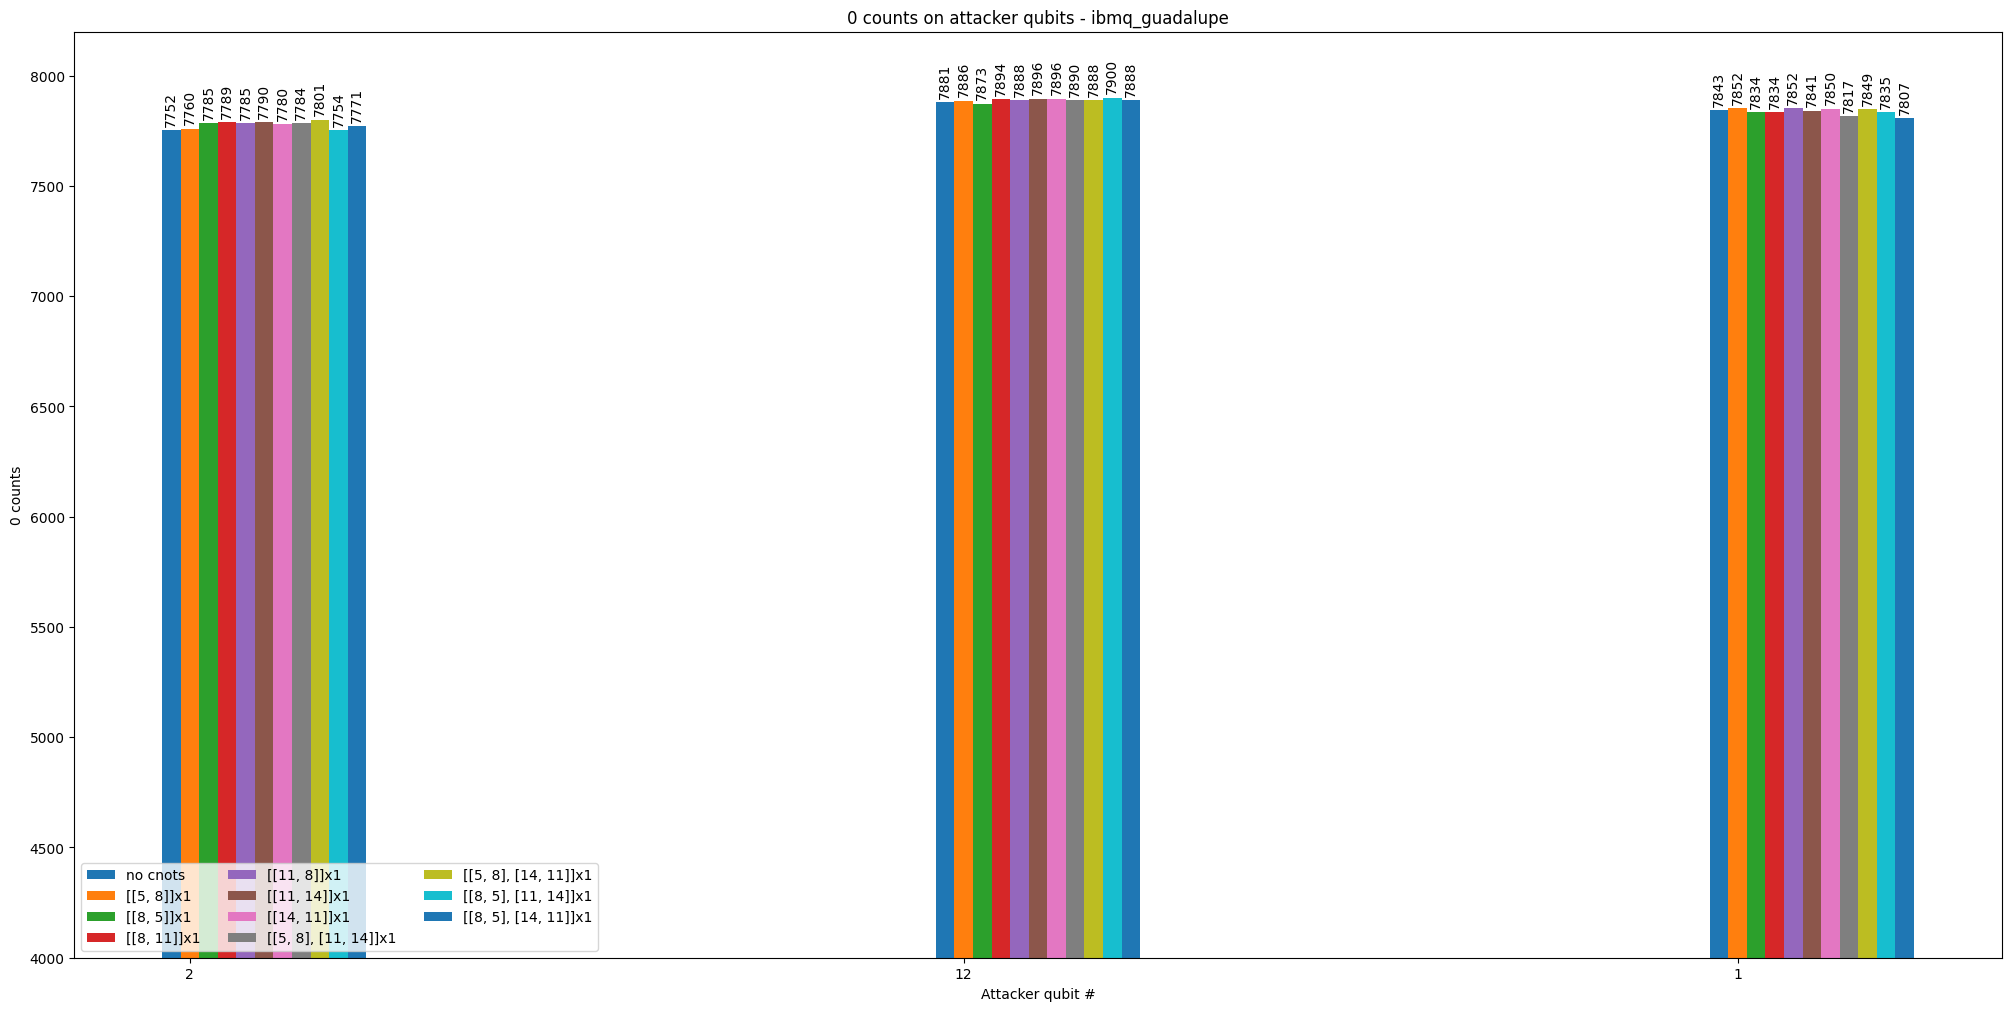

(10, 15, 0)


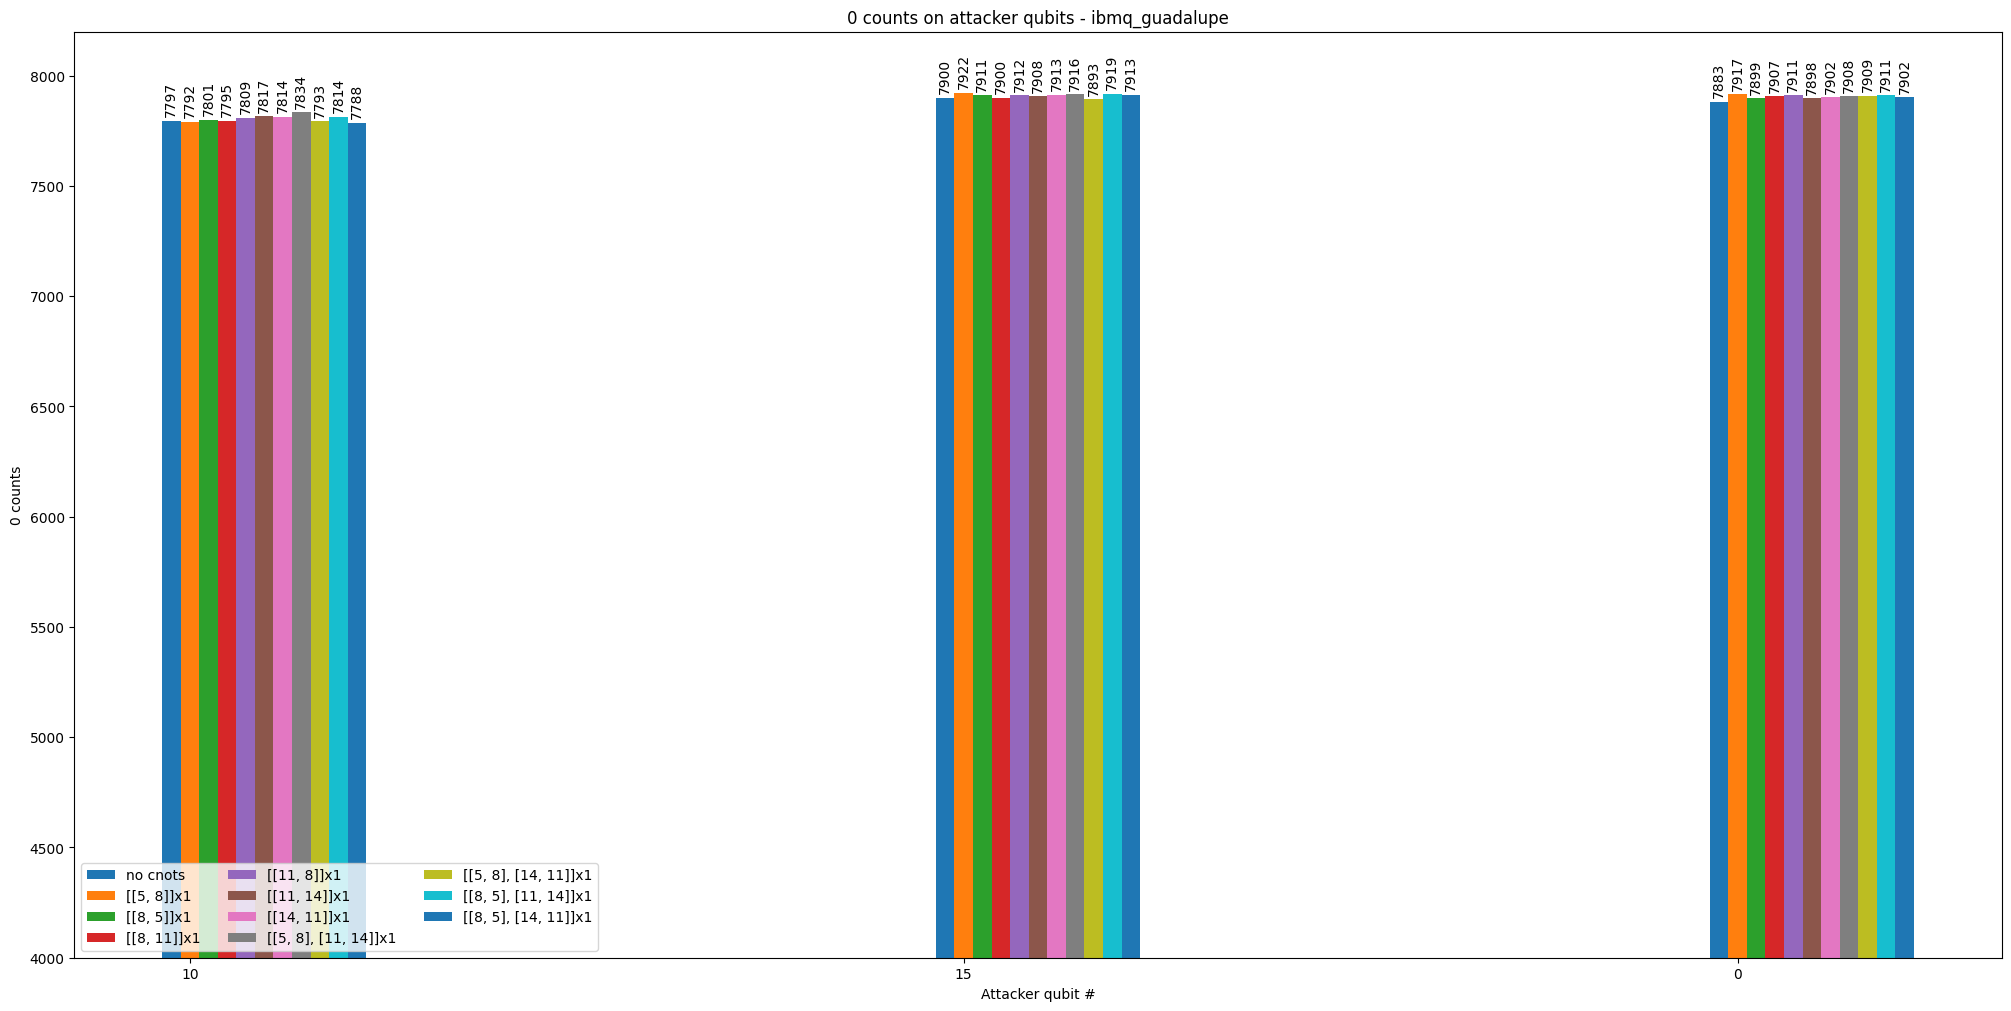

(4, 6, 7)


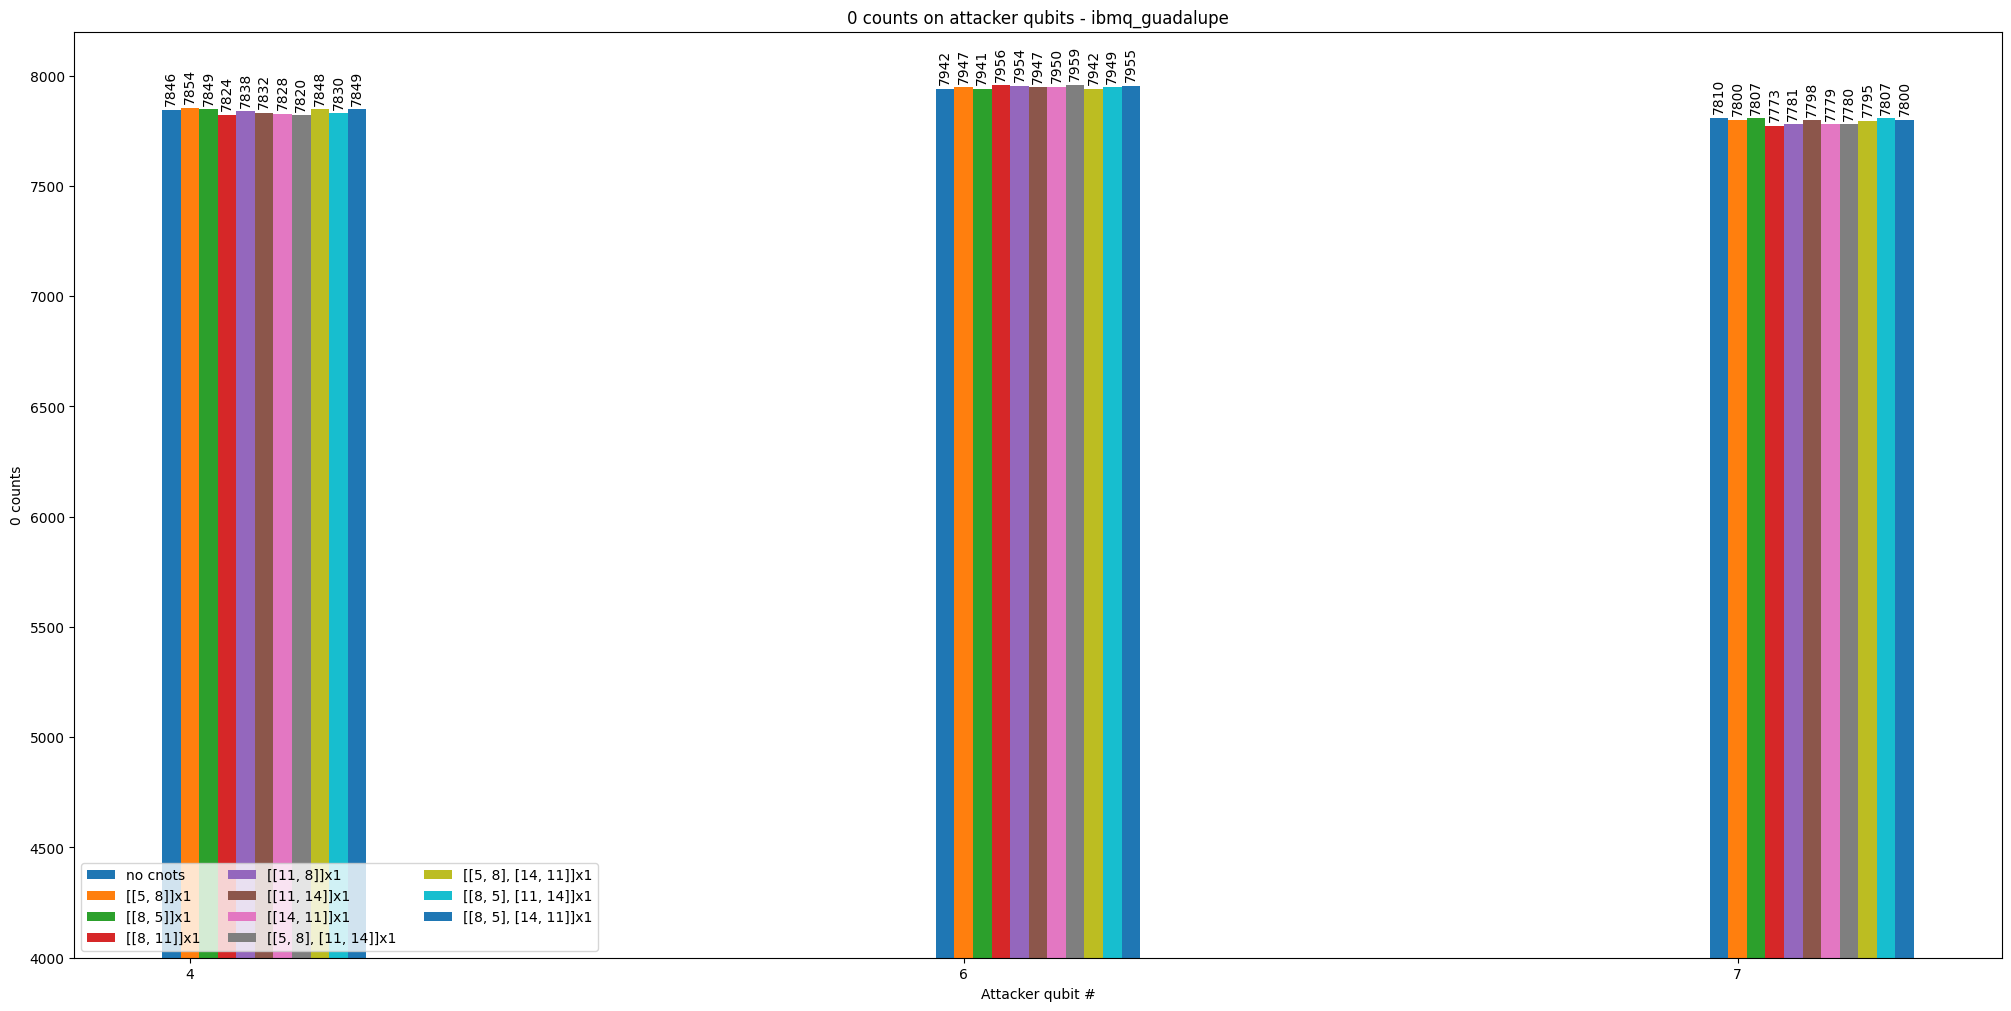

In [7]:
n = 3
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, qc, name in zip(counts, qcs, qc_circ_names):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        experiments[name] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.024
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title('0 counts on attacker qubits - ibmq_guadalupe')
    ax.set_xticks(x + width, snooper_set)
    ax.legend(loc='lower left', ncols=3)
    ax.set_ylim(4000, 8200)

    plt.show()

# Job - ci99l5p61rck8jqip8c0

In [8]:
job_id = 'ci99l5p61rck8jqip8c0'

## Fetch data from backend

In [9]:
job = provider.backend.retrieve_job(job_id)
qcs = job.circuits()
counts = job.result().get_counts()

## Analysis

(3, 9, 13)


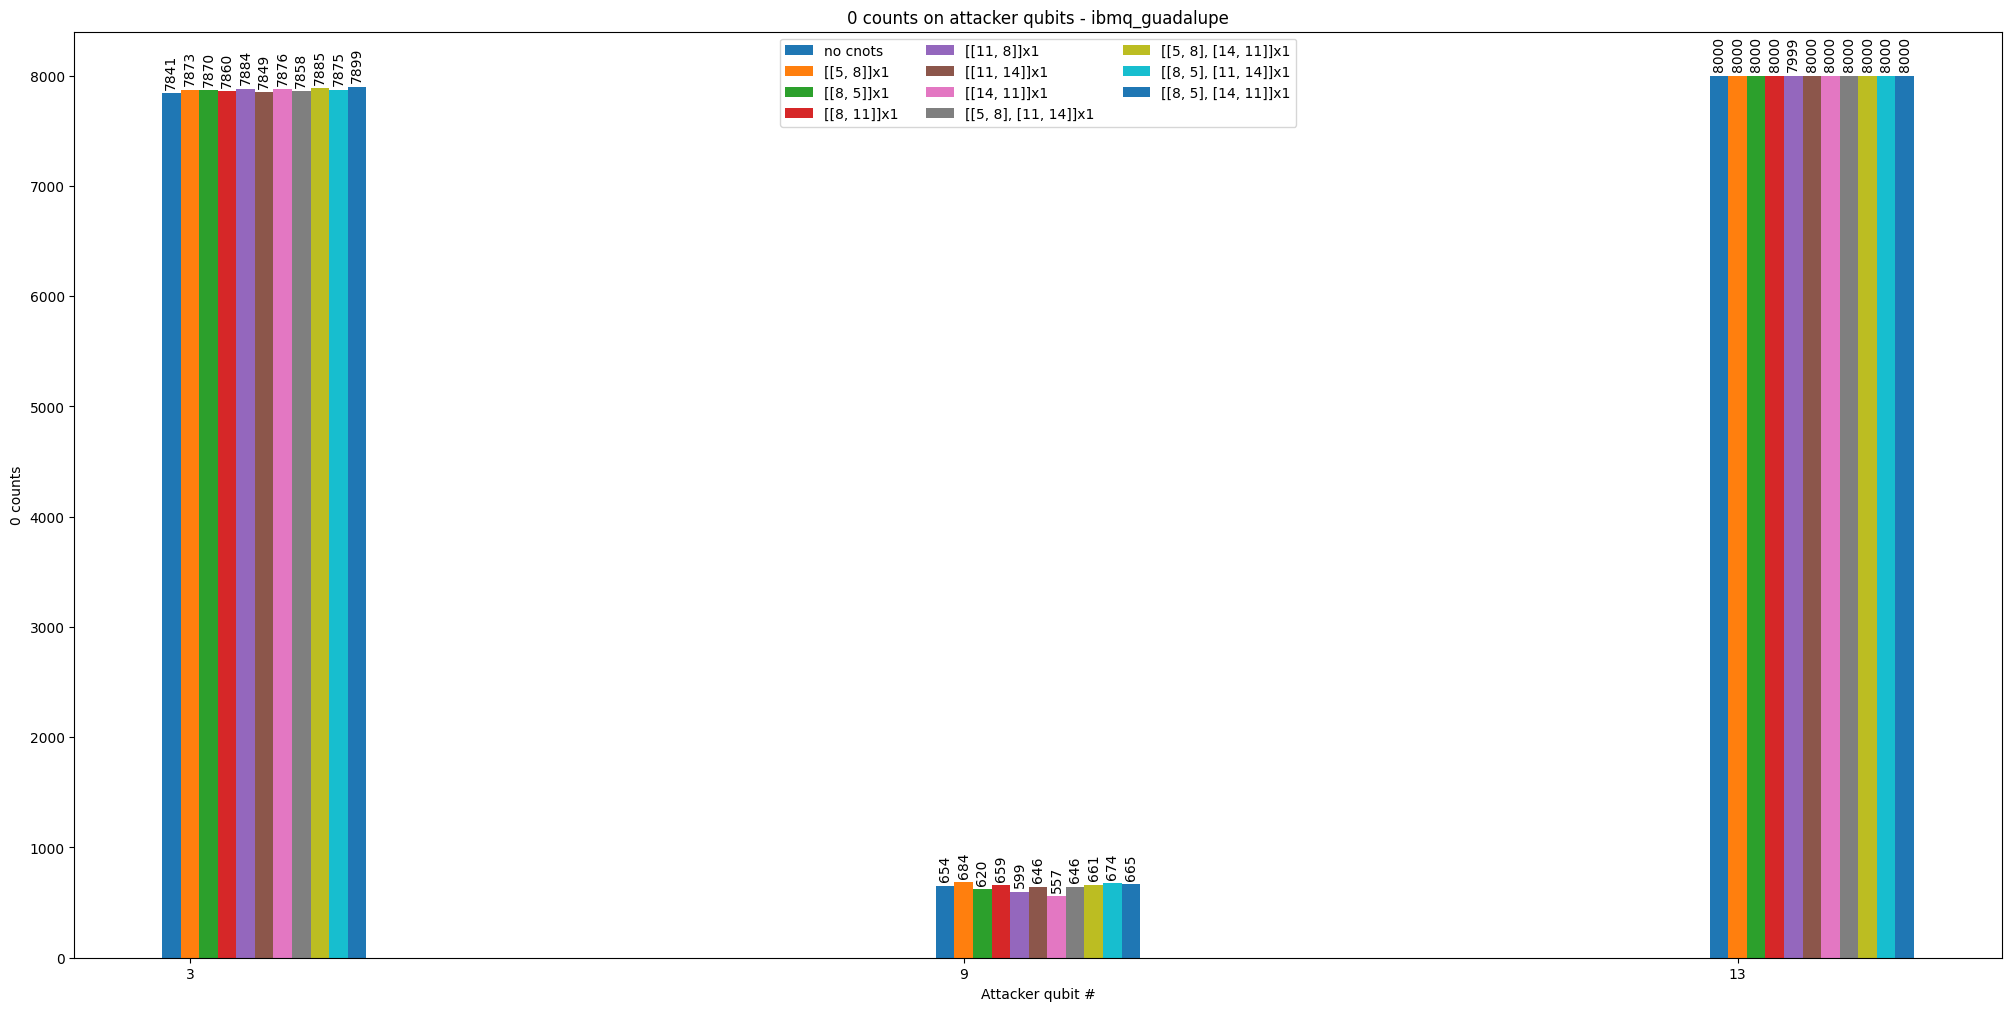

(2, 12, 1)


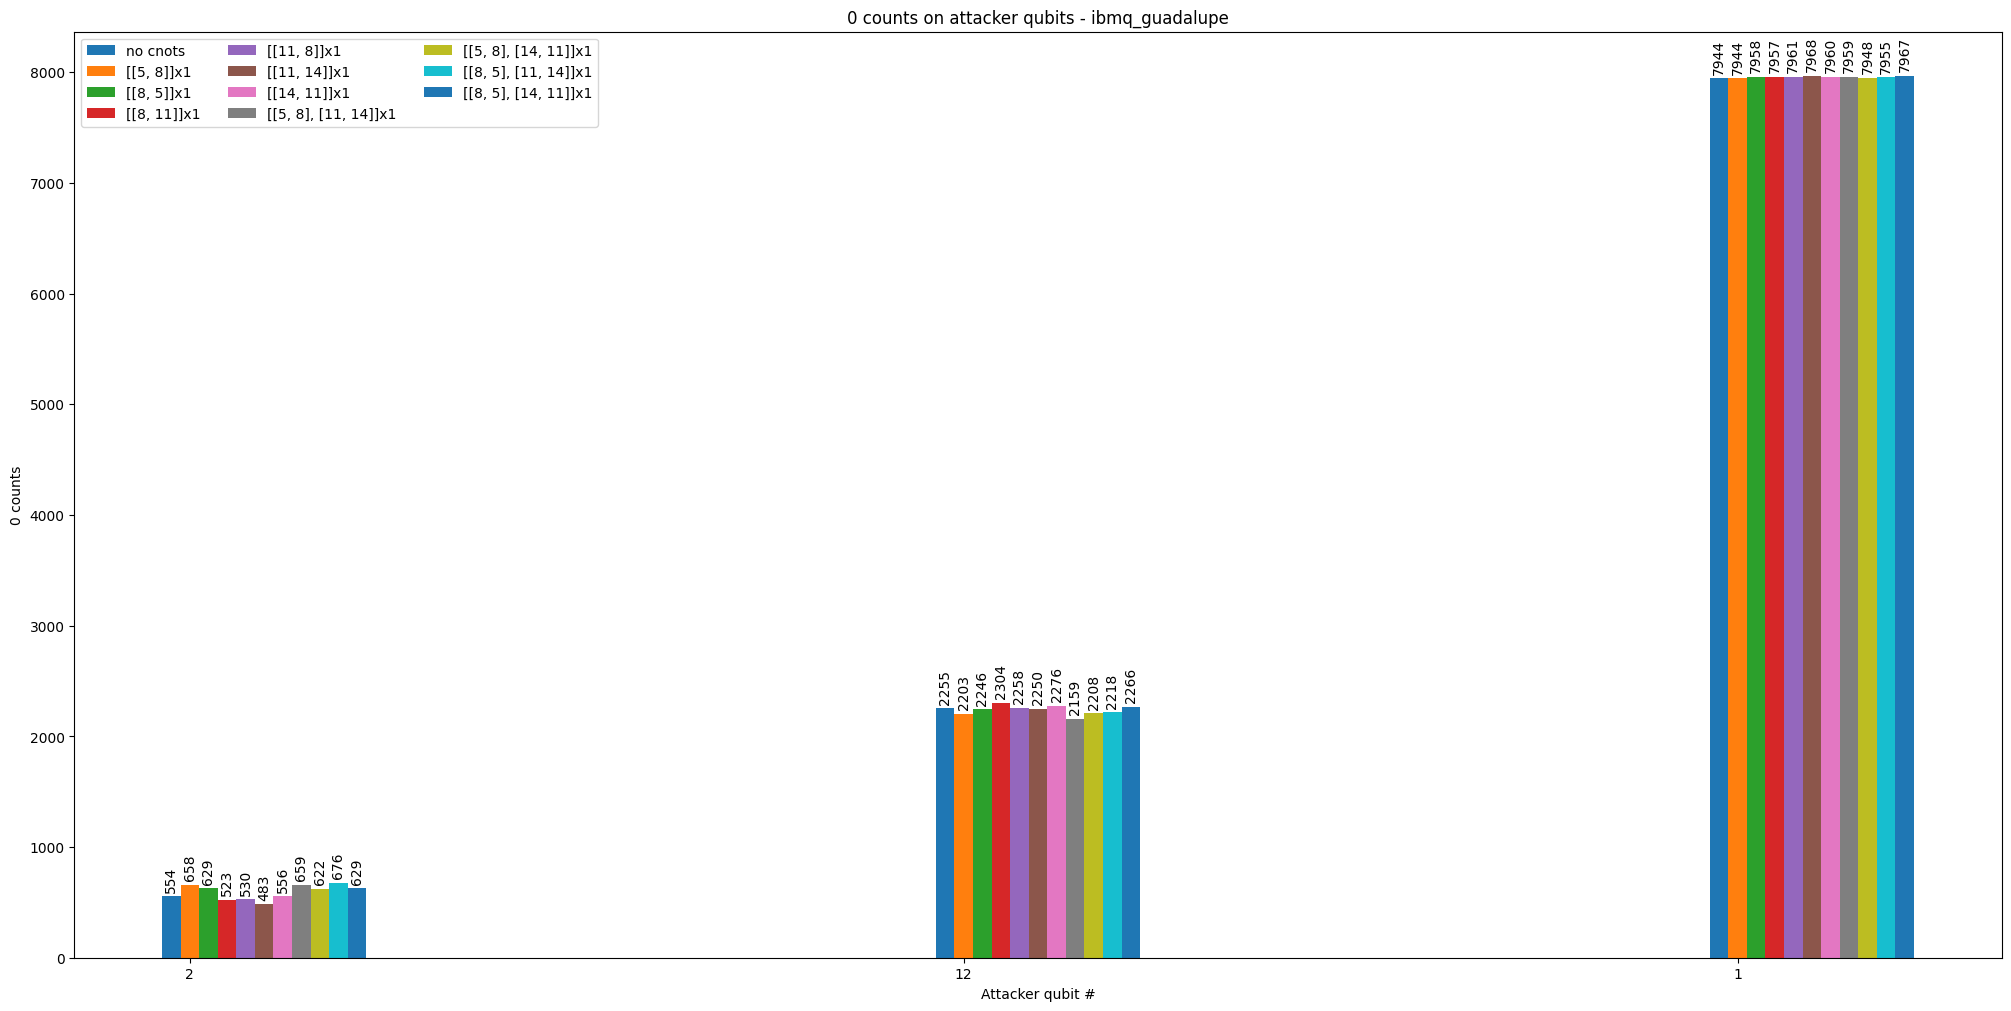

(10, 15, 0)


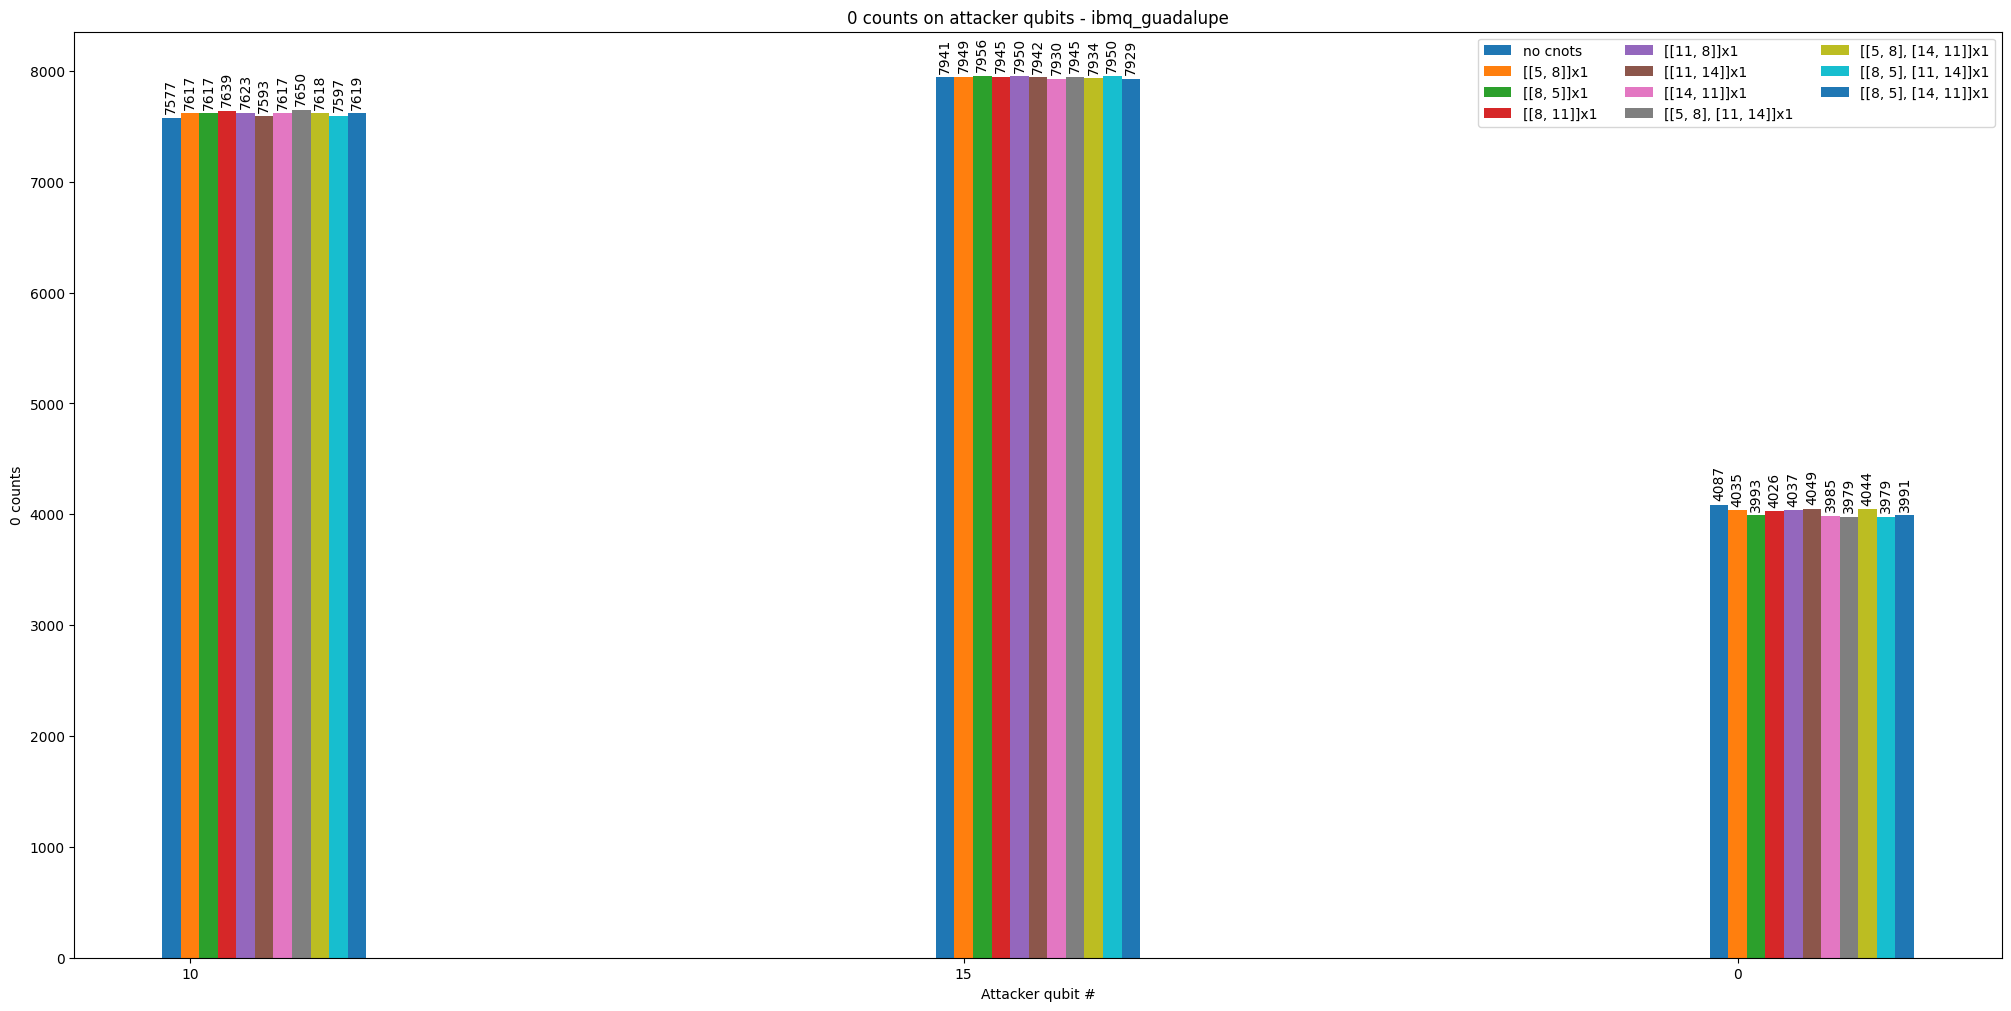

(4, 6, 7)


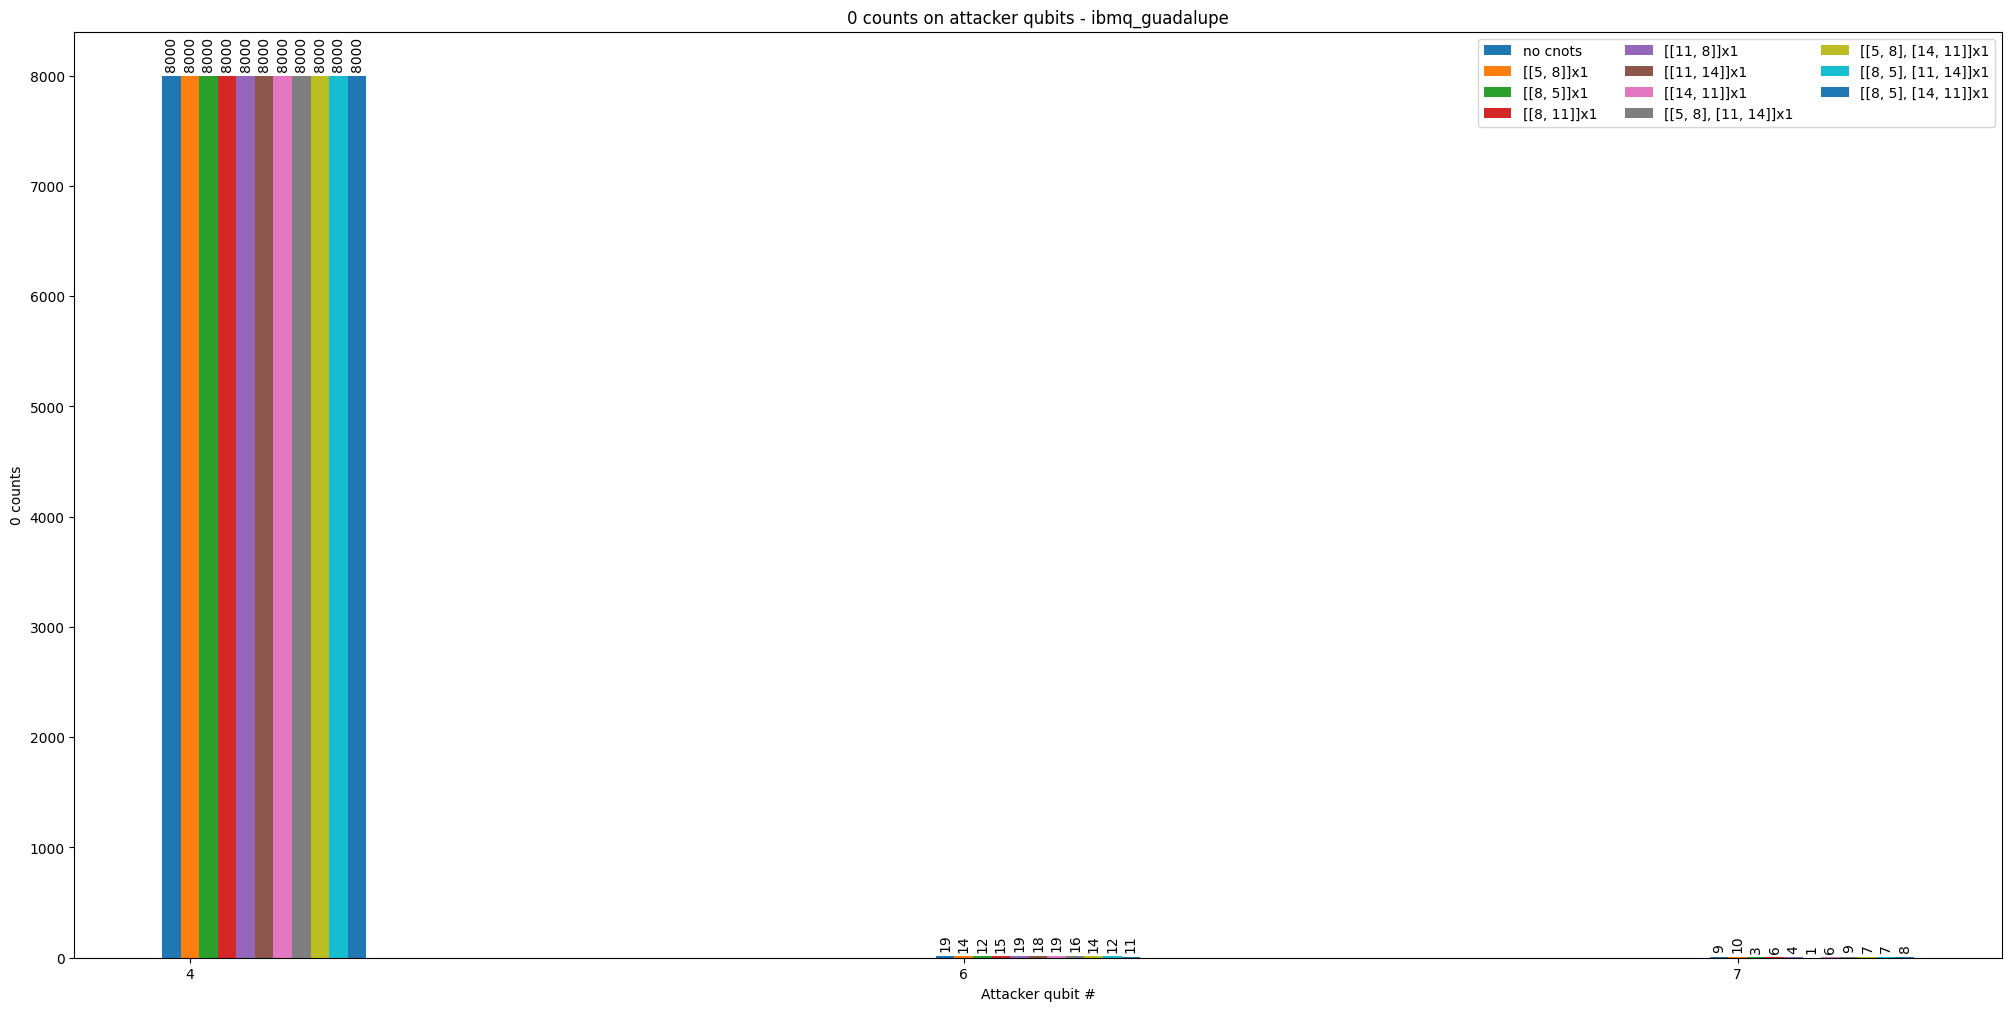

In [14]:
n = 3
for start in range(0, len(snooper_qubits), n):
    experiments = dict()
    snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
    print(snooper_set)
    for count, qc, name in zip(counts, qcs, qc_circ_names):
        m_counts = []
        for qubit in snooper_set:
            m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
        experiments[name] = m_counts

    x = np.arange(len(snooper_set))
    width = 0.024
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

    for attribute, measurement in experiments.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, rotation='vertical')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('0 counts')
    ax.set_xlabel('Attacker qubit #')
    ax.set_title('0 counts on attacker qubits - ibmq_guadalupe')
    ax.set_xticks(x + width, snooper_set)
    ax.legend(ncols=3)
    # ax.legend(loc='lower left', ncols=3)
    # ax.set_ylim(0, 8200)

    plt.show()